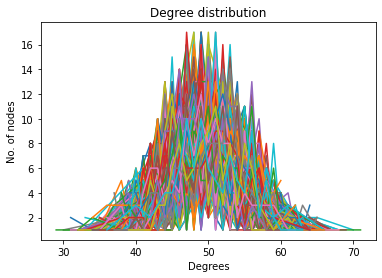

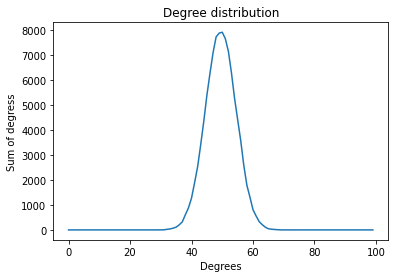

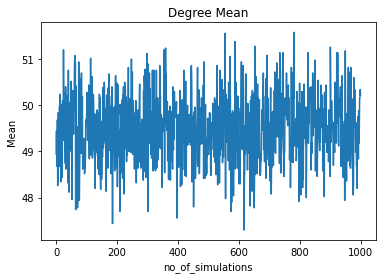

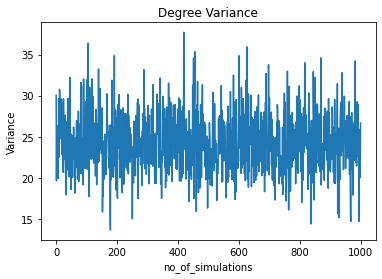

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

# num_of_nodes = int(input("please enter number of nodes : "))
# p = float(input("enter the probability of edge creation : "))
# num_of_simulation = int(input("please enter number of simulation : "))
num_of_nodes = 100
p = 0.5
num_of_simulation = 1000
var_g = []
mean_g = []
y_axis = []
y_axis2 = []
degrees_list = []

for i in range(num_of_nodes):
    degrees_list.append(0)
    y_axis2.append(i)

for i in range(num_of_simulation):
    graph = nx.erdos_renyi_graph(n=num_of_nodes, p=p)
    all_degrees = list(dict((nx.degree(graph))).values())

    var_g.append(np.var(all_degrees))
    mean_g.append(np.mean(all_degrees))
    y_axis.append(i)

    unique_degree = list(set(all_degrees))
    unique_degree.sort()
    nodes_with_degree = []
    for i in unique_degree:
        temp = all_degrees.count(i)
        nodes_with_degree.append(temp)
        degrees_list[i] = (degrees_list[i] + temp)

    plt.plot(unique_degree, nodes_with_degree)

plt.xlabel("Degrees")
plt.ylabel("No. of nodes")
plt.title("Degree distribution")
plt.show()

plt.plot(y_axis2 , degrees_list)
plt.xlabel("Degrees")
plt.ylabel("Sum of degress")
plt.title("Degree distribution")
plt.show()

# mean_g.sort()
plt.plot(y_axis , mean_g)
plt.xlabel("no_of_simulations")
plt.ylabel("Mean")
plt.title("Degree Mean")
plt.show()

# var_g.sort()
plt.plot(y_axis , var_g)
plt.xlabel("no_of_simulations")
plt.ylabel("Variance")
plt.title("Degree Variance")
plt.show()



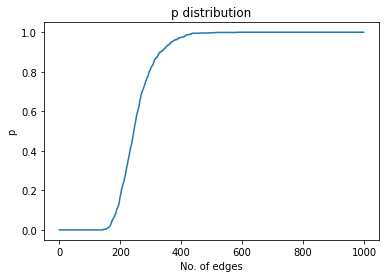

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

def nodes_connected(graph, u, v):
    return u in graph.neighbors(v)

def plot_probability_distribution(p_is_connected):
    plt.plot(p_is_connected)
    plt.ylabel("p")
    plt.xlabel("No. of edges")
    plt.title("p distribution")
    plt.show()


# num_of_nodes = int(input("please enter number of nodes : "))
# num_of_edges = int(input("please enter number of edges : "))
# num_of_simulation = int(input("please enter number of simulation : "))

num_of_nodes = 100
num_of_edges = 1000
num_of_simulation = 1000
# init probability graph
graphs = []
graphs_is_connected = []
p_is_connected = []
for i in range(0, num_of_simulation):
    graph = nx.Graph()
    graph.add_nodes_from(range(1, num_of_nodes + 1))
    graphs.append(graph)
    graphs_is_connected.append(False)
# add edges and calculate probability
for i in range(0, num_of_edges):
    p = 0
    for j, graph in enumerate(graphs):
        if graphs_is_connected[j]:
            p = p + 1
            continue;
        u = random.randint(1, num_of_nodes)
        v = random.randint(1, num_of_nodes)
        while u == v or nodes_connected(graph, u, v):
            u = random.randint(1, num_of_nodes)
            v = random.randint(1, num_of_nodes)

        graph.add_edge(u, v)
        if nx.is_connected(graph):
            p = p + 1
            graphs_is_connected[j] = True
    p_is_connected.append(p / num_of_simulation)
plot_probability_distribution(p_is_connected)

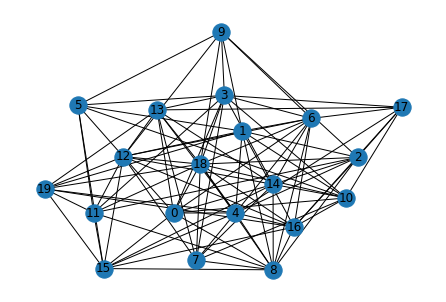

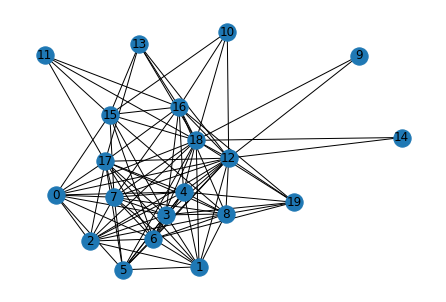

In [ ]:
# num_of_nodes = int(input("please enter number of nodes : "))
# p = float(input("enter the probability of edge creation : "))

def sort_tuple(tup):
    tup.sort(key=lambda x: x[1])
    return tup

num_of_nodes = 20
p = 0.5

graph = nx.erdos_renyi_graph(n=num_of_nodes, p=p)
nx.draw(graph, with_labels=True)
plt.show()

fitness = []
for n in range(num_of_nodes):
    fitness.append(random.random())

for i in range(num_of_nodes ** 2):
    edges = list(graph.edges)
    nonedges = list(nx.non_edges(graph))
    # random edge choice
    chosen_edge = random.choice(edges)
    list_of_neighbours = []

    for x in nonedges:
        if chosen_edge[0] == x[0]:
            list_of_neighbours.append((x[1], float(fitness[x[1]] * graph.degree[x[1]])))

    if len(list_of_neighbours) == 0:
        continue

    list_of_neighbours = sort_tuple(list_of_neighbours)
    chosen_node = list_of_neighbours[-1][0]
    # chosen_nonedge = random.choice([x for x in nonedges if chosen_edge[0] == x[0]])
    # print(chosen_edge[0], chosen_edge[1])
    graph.remove_edge(chosen_edge[0], chosen_edge[1])
    # add new edge
    graph.add_edge(chosen_edge[0], chosen_node)
    # print(chosen_edge[0], chosen_node)

nx.draw(graph, with_labels=True)
plt.show()

